# 😀/😞 Sentiment Analysis on Restaurant Reviews using NLP

*This note book builds an end-to-end classification model uisng NLP, Naive Bayes.*

## 1.Problem

Identify whether the reviews of a restaurant made by customers are postive or negative. 

## 2.Data
The data is collected from various sources on internet and collated into a single tab seperated csv file(Restaurant_Reviews.csv) and made available in the repo.


## 3.Evaluation
Evaluation is done on basis of metrics like accuracy score.

## 4.Features
Some information about data:
* Entire data is in text format, so its better to use NLP for developing our ML models.
* Overall, we have 1000 reviews.
  * 500 positive reviews
  * 500 negative reviews
* We have two labels(columns) namely:
  * Review : which is the review itself.
  * Liked : which tells whether the review is positive or negative.
    * 1 - for positive
    * 0 - for negative
* Text language is english.

### Connect Google Drive to Google Colab

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


### Get your workspace ready

In [21]:
# Import necessary libraries
import pandas as pd
import numpy as np
import nltk
import re

# Other imports would be imported at specific necessary cells

### Data Preprocessing

In [7]:
# Load the dataset into dataframe
df = pd.read_csv("/content/drive/My Drive/Restaurant Reviews/Restaurant_Reviews.tsv", delimiter='\t')

In [10]:
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [12]:
# Know the shape of the dataframe
df.shape

(1000, 2)

In [14]:
# Know the columns of the dataframe
df.columns

Index(['Review', 'Liked'], dtype='object')

In [17]:
# Know the data types of all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


### Clean the data
  * Remove all the special characters
  * Change all the characters to lower case
  * Tokenize each reviews into words
  * Remove stopwords
  * Perform Stemming / Lemmatization

In [19]:
# Download stopwords

# Stopwords are words that add no value to the prediction.
# Example of these words are: the, is, at, or, his, him, it, so, etc.

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [20]:
# Import other stopwords and PortetStemmer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [22]:
# Cleaning the reviews
corpus = [] # corpus is list of words
ps = PorterStemmer()
for i in range(len(df)):

  # cleaning special characters from reviews
  review = re.sub(pattern='[^a-zA-Z]', repl=' ', string=df['Review'][i])

  # converting each review into lowercase
  review = review.lower()

  # tokenizing the review into words
  review_words = review.split()

  # removing the stop words
  review_words = [word for word in review_words if word not in set(stopwords.words('english'))]

  # stemming the words
  review_words = [ps.stem(word) for word in review_words]

  # joining the stemmed words
  review = ' '.join(review_words)

  # add to corpus
  corpus.append(review)

In [26]:
corpus[0:10]

['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch']

### Create Bag of Words (convert text to numerical vectors)

As we know each machine learning model takes only numeric input(either 0 or 1), we will convert all the reviews into numbers, and then create vectors.

In [61]:
# import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(max_features=1500)
X = tf.fit_transform(corpus).toarray()
y = df.iloc[:,1].values

In [62]:
X.shape, y.shape

((1000, 1500), (1000,))

### Create test and train sets


In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [64]:
(X_train.shape, y_train.shape)

((800, 1500), (800,))

In [65]:
(X_test.shape, y_test.shape)

((200, 1500), (200,))

### Model Building

Here we are using Naive Bayes classifier model, it works on probability.

In [66]:
# import Naive Bayes from sklearn
from sklearn.naive_bayes import MultinomialNB

# create an instance for MultinomialNB
classifier = MultinomialNB()

# Fit the data to the model
classifier.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

### Predict train and test results

In [67]:
y_train_preds = classifier.predict(X_train)

In [68]:
y_test_preds = classifier.predict(X_test)

### Evaluation

In [69]:
# Calculate Accuracy, Precision and Recall
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

accuracy = accuracy_score(y_test, y_test_preds)
recall = recall_score(y_test, y_test_preds)
precision = precision_score(y_test, y_test_preds)

print("///---Scores---///")
print('Accuracy Score is : {}%'.format(round(accuracy*100,2)))
print('Precision Score is : {}'.format(round(precision,2)))
print('Recall Score is : {}'.format(round(recall,2)))

///---Scores---///
Accuracy Score is : 77.5%
Precision Score is : 0.77
Recall Score is : 0.8


### Confusion Matrix

In [70]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_preds)
cm

array([[73, 24],
       [21, 82]])

Text(33.0, 0.5, 'Actual Values')

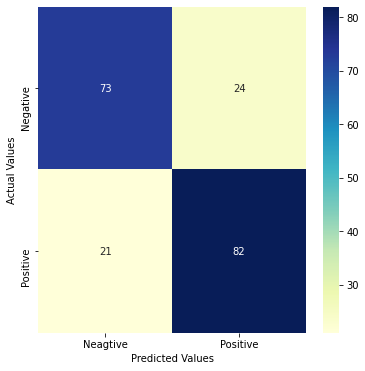

In [74]:
# Plotting confusion matrix
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, cmap="YlGnBu", xticklabels=['Neagtive', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')